# Red Wine Quality (Classification)

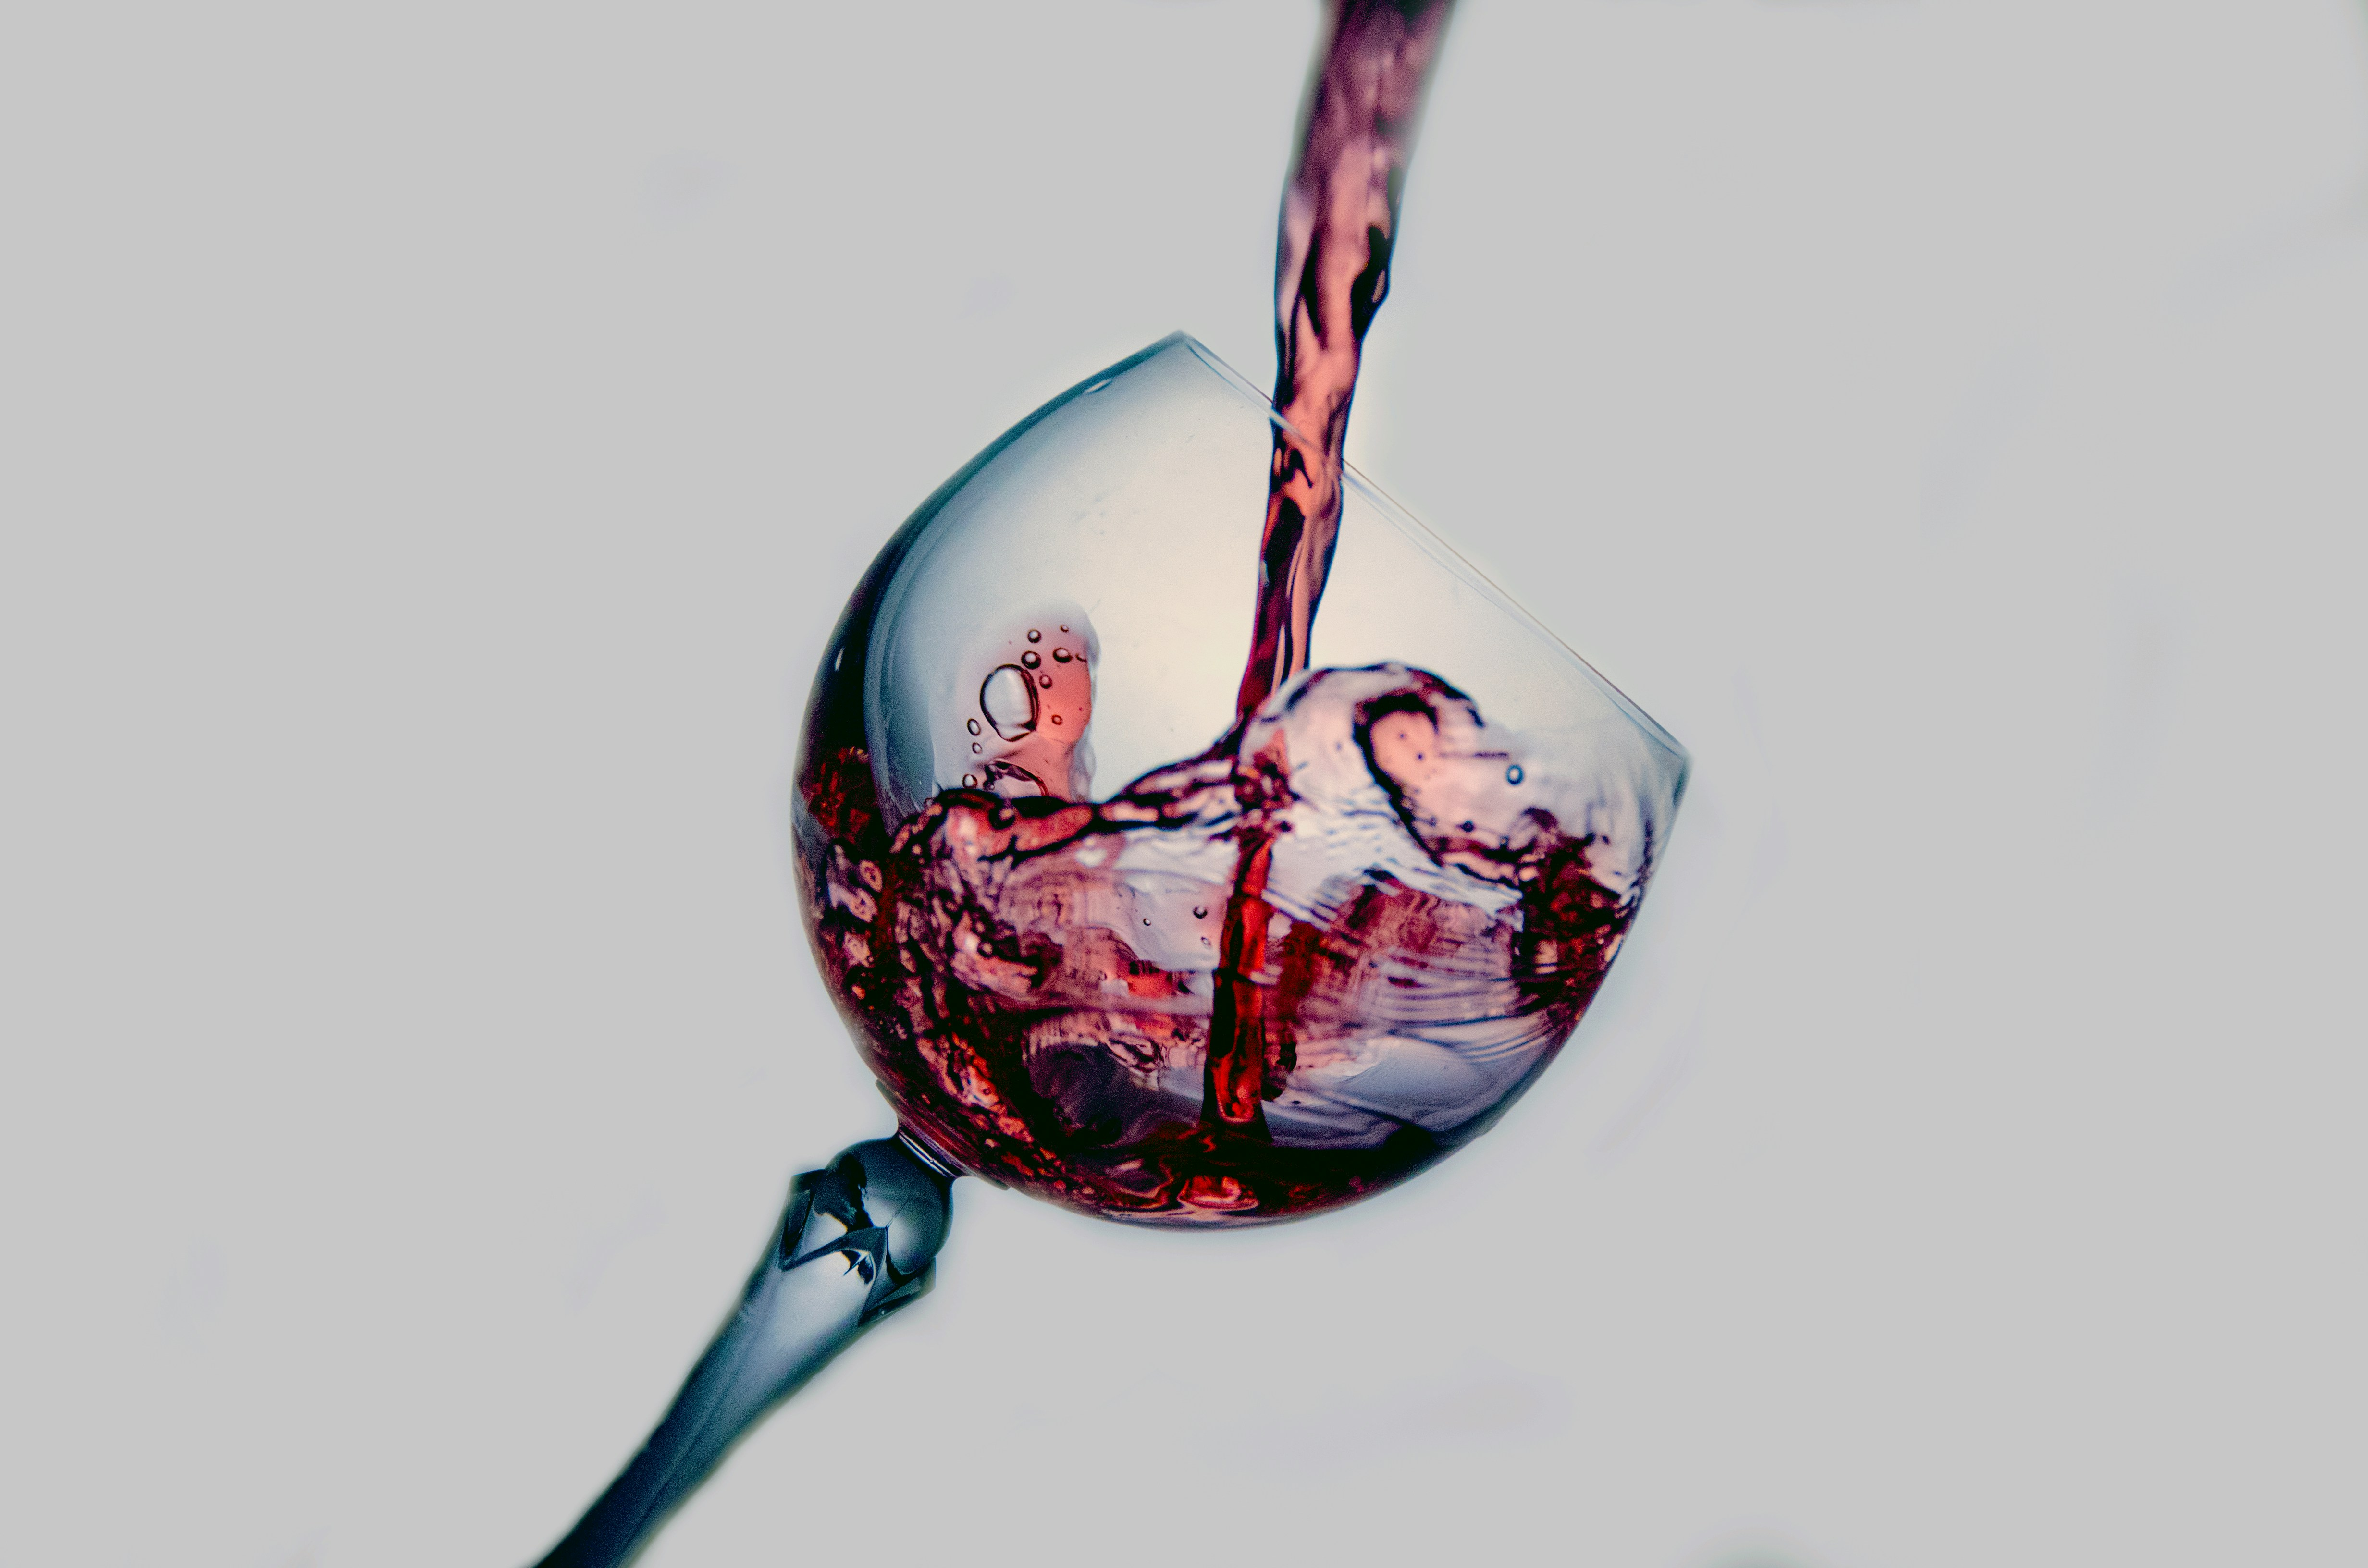

## Import libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn  import preprocessing
from sklearn.preprocessing import StandardScaler
# train_test_split
from sklearn.model_selection import train_test_split
# sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# sklearn model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

The data is taken from Kaggle. This dataset is also available on the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

In [35]:
wine_data = pd.read_csv("C:/Users/leebr/OneDrive/Desktop/Universityof_colorado/University Of Colorado-20240608T100451Z-001/University Of Colorado/Machine_learning/winequality-red.csv",delimiter  = ";")

In [36]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Wrangling

1. Identify and calculate the percentage of the missing values in each attribute.

In [37]:
print(wine_data.isnull().sum()/len(wine_data)*100)


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64


2. Identify which columns are numerical and categorical.

In [38]:
print(wine_data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


## Exploratory Data Analysis Methods

1. Visualize feature and target distribution in the dataset using histogram

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

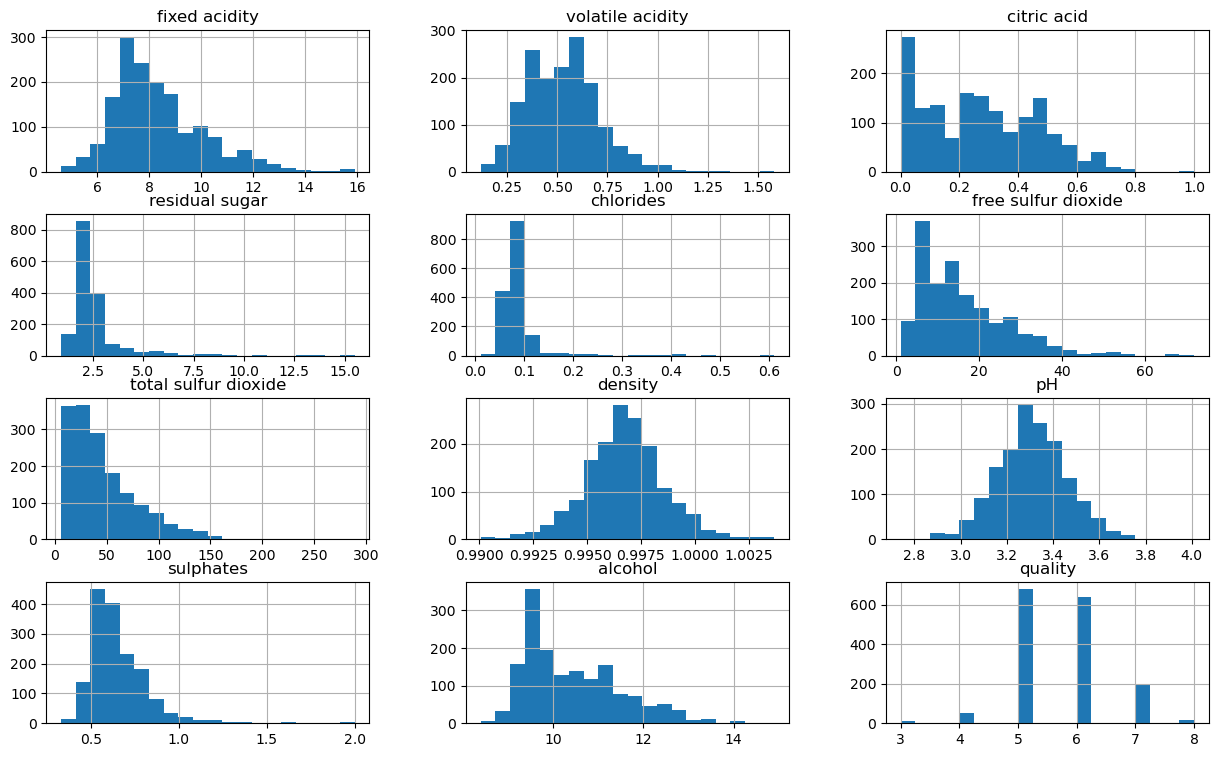

In [39]:
# visualize feature distribution
wine_data.hist(figsize = (15,9),bins = 20)

In [40]:
# .value_counts()
wine_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Result: the quality score 5 & 6 has more number of sample in the dataset

Correlation Heatmap

Text(0.5, 1.0, 'Feature Correlation Heatmap')

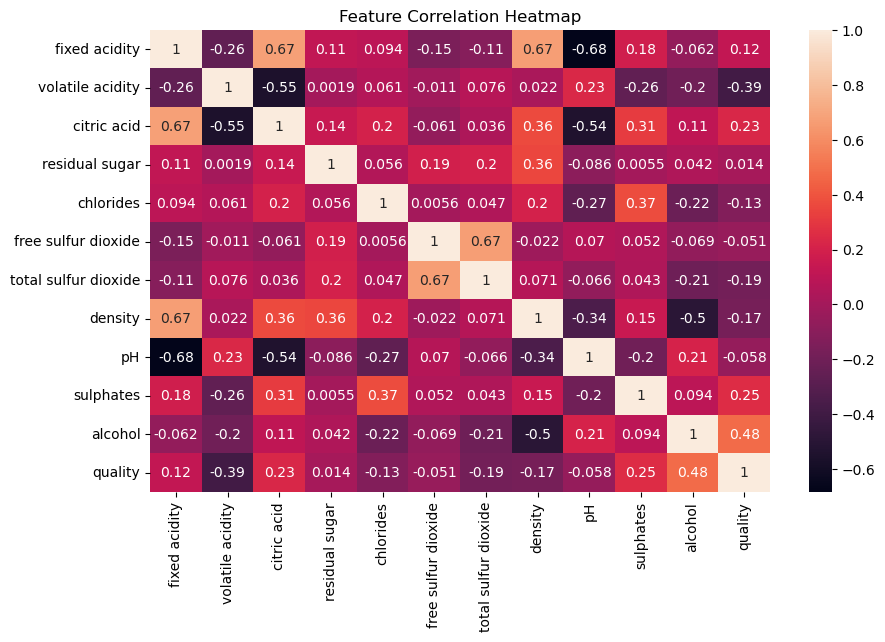

In [41]:
plt.figure(figsize = (10,6))
sns.heatmap(wine_data.corr(), annot =True)
plt.title("Feature Correlation Heatmap")

There is strong relationship with wine quality, these features have a direct impact on wine taste, preservation, and overall quality.


Relationship between features.
1. Alcohol VS Wine Quality
2. Volitile Acidity VS Wine Quality
3. Citric Acid VS Wine Quality

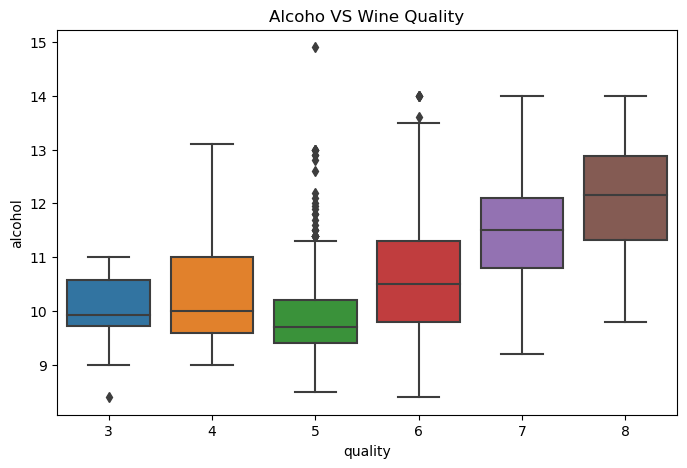

In [42]:
#1.Alcohol VS Wine Quality
# Higher Alcohol better quality
plt.figure(figsize = (8,5))
sns.boxplot(x = 'quality', y = 'alcohol', data = wine_data)
plt.title("Alcoho VS Wine Quality")
plt.show()

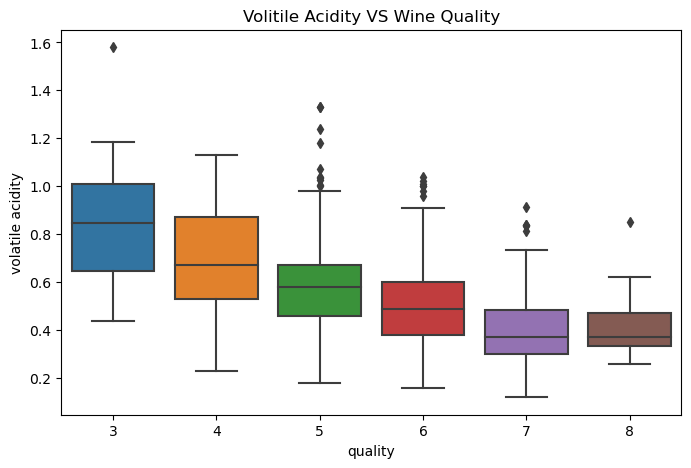

In [43]:
#2. Volitile Acidity VS Wine Quality
# higher acidity = worse quality
plt.figure(figsize = (8,5))
sns.boxplot(x = 'quality', y = 'volatile acidity', data = wine_data)
plt.title("Volitile Acidity VS Wine Quality")
plt.show()

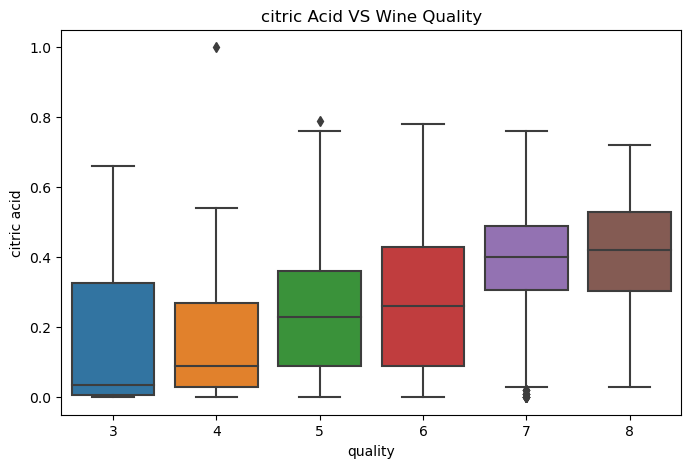

In [44]:
#3. Volitile Acidity VS Wine Quality
# Balance citric acid improve quality
plt.figure(figsize = (8,5))
sns.boxplot(x = 'quality', y = 'citric acid', data = wine_data)
plt.title("citric Acid VS Wine Quality")
plt.show()

The using pairplot from seaborn lib to see the interaction between features.

In [45]:
#sns.pairplot(wine_data, hue = 'quality')

In [46]:
# max and min
def area(df):
    min_col = {}
    mean_col = {}
    max_col = {}
    
    for col in df:
        max_col[col]= df[col].max()
        min_col[col]= df[col].min()
        mean_col[col]= df[col].mean()

    result = pd.DataFrame([min_col,mean_col, max_col], index=['min','mean', 'max'])
    return result

df = pd.DataFrame(wine_data ,columns=wine_data.columns)
df
area(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Analysis and Prediction

In [47]:
# X is the data frame (features), we need to separate X to standardscaler()

In [48]:
X = wine_data.drop(columns=['quality'])

In [49]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Create a Numpy array from the column quality in the wine_data, by applying the method *.to_numpy()* then assign it to variable Y.

In [50]:
y = wine_data['quality'].to_numpy()

Standardize the data X then reassign it to the variable X



In [51]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

Split the wine_data dataset in train and test set, by using the method train_test_split. The parameter test_size = 0.2 and random_state = 2

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2)

In [53]:
print ('Train set:')
print('X-train= ', X_train.shape,'y-train= ',y_train.shape)
print ('Test set:')
print('X-test= ', X_test.shape,  'y-test= ',y_test.shape)

Train set:
X-train=  (1279, 11) y-train=  (1279,)
Test set:
X-test=  (320, 11) y-test=  (320,)


### Logistic Regression

Create a logistic regression object  then create a  GridSearchCV object  <code>logregg</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [54]:
parameters ={"C":[0.01,0.02,0.03,0.04,0.05,0.06,0.1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logregg = GridSearchCV(estimator =lr ,cv = 3, param_grid = parameters)
logregg.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1],
                         'penalty': ['l2'], 'solver': ['lbfgs']})

 We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [55]:
print("tuned hpyerparameters :(best parameters) ",logregg.best_params_)
print("accuracy :",logregg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.05, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.5996873774523278


Accuracy on test data

In [56]:
print("Logistic Regression test data accuracy :",logregg.score(X_test, y_test))


Logistic Regression test data accuracy : 0.59375


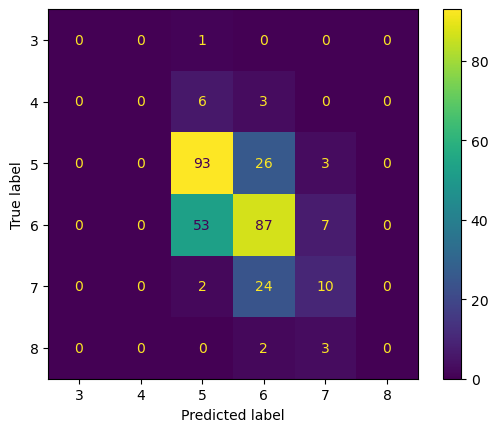

In [57]:
y_pred =logregg.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=logregg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logregg.classes_)
disp.plot()
plt.show()

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [58]:
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-1, 1, 5),
              'gamma':np.logspace(-1, 1, 5)}
svm = SVC()

In [59]:
svm_cv = GridSearchCV(svm, parameters, cv= 3)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ]),
                         'gamma': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [60]:
# on train data
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 3.1622776601683795, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy : 0.6340923500932737


Test the accuracy on test set

In [61]:
print("Support Vector Machine :",svm_cv.score(X_test, y_test))


Support Vector Machine : 0.65


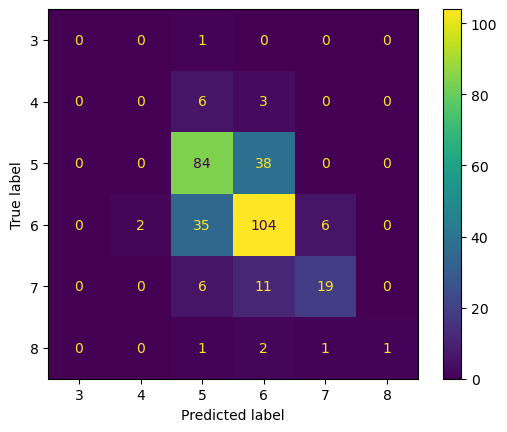

In [62]:
y_pred =svm_cv.predict(X_test)
cm_02 = confusion_matrix(y_test, y_pred, labels=svm_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_02,
                              display_labels=svm_cv.classes_)
disp.plot()
plt.show()

### Decision Tree

Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [63]:
from sklearn import tree
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [64]:
tree_cv = GridSearchCV(tree, parameters, cv=2)
tree_cv.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [65]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.5887336169796558


In [66]:
print("Support Vector Machine :",tree_cv.score(X_test, y_test))

Support Vector Machine : 0.515625


In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [68]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
y_pred = model.predict(X_test)

test_data_accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", test_data_accuracy)

Accuracy:  0.671875


## Discussion

There are various ways to solve this problem, Our main goal is to minimize loss function for which, one of the famous algorithm is XGBoost (Extreme boosting) technique which works by building an ensemble of decision trees sequentially where each new tree corrects the errors made by the previous one. It uses advanced optimization techniques and regularization methods that reduce overfitting and improve model performance. 

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. While it can handle regression problems, SVM is particularly well-suited for classification tasks.
The key idea behind the SVM algorithm is to find the hyperplane that best separates two classes by maximizing the margin between them. This margin is the distance from the hyperplane to the nearest data points (support vectors) on each side.

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors. The article explores the fundamentals of logistic regression, it’s types and implementations.

Timeline:

Data understanding: Understand the data is really important as it is the begining step of prediction in either for regression or classification task. What features affect the target variable either negatively or positively. we can see the interaction by using correlation matrix.


Data preprocessing: The preprocessing task is contain with many application on the dataset for example, to handle the missing value and remove the outlier from the dataset. Apply the feature engineering so that we would have the more better predicting features.

Exploratory data analysis: visualization the data for the features and identifying trends and potential outliers.

Using the best machine learning model: based on performance of the models




## Conclusion

Choosing the right method is important for prediction (Classification), Therefore choosing the right method based on accuracy.